#### Training

In [ ]:
import torch
import numpy as np
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.optim.lr_scheduler import ReduceLROnPlateau, CosineAnnealingLR, LambdaLR, CosineAnnealingWarmRestarts
from IPython.display import clear_output
from tqdm.notebook import tqdm

# Import MD-RNN from mdrnn.py
import rmdn as rmdn

# Import Utility Functions from utils.py
import utils

# Determine device
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

# Default training loop parameters
TRAINING_PARAMS = {
    'hidden_size': 32,
    'initial_learning_rate': 0.001,
    'min_lr': 1e-5,
    'num_epochs': 100,
    'batch_size': 32
}

cuda:0


#### Training Pass

Training Progress:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 1/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1/200, Loss: 0.8840


Epoch 2/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 2/200, Loss: -0.1683


Epoch 3/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 3/200, Loss: 0.5158


Epoch 4/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 4/200, Loss: 0.1099


Epoch 5/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 5/200, Loss: -0.5504


Epoch 6/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 6/200, Loss: -0.5710


Epoch 7/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 7/200, Loss: -0.6145


Epoch 8/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 8/200, Loss: -0.6130


Epoch 9/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 9/200, Loss: -0.6306


Epoch 10/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 10/200, Loss: -0.6380


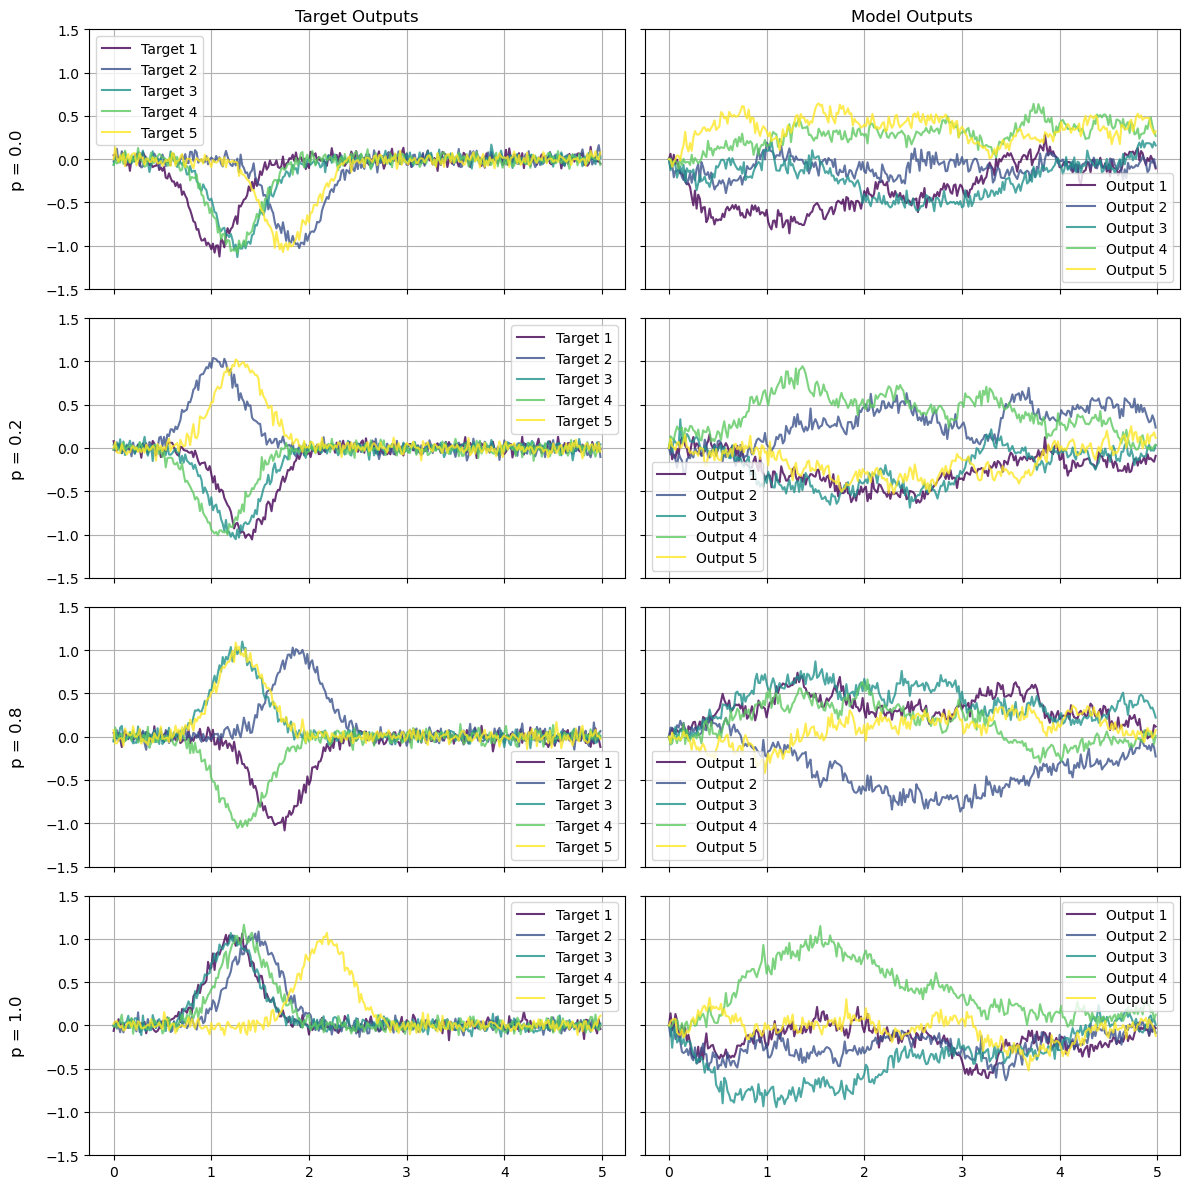

Epoch 11/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 11/200, Loss: -0.6386


Epoch 12/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 12/200, Loss: -0.6456


Epoch 13/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 13/200, Loss: -0.6478


Epoch 14/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 14/200, Loss: -0.6496


Epoch 15/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 15/200, Loss: -0.6527


Epoch 16/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 16/200, Loss: -0.6531


Epoch 17/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 17/200, Loss: -0.6584


Epoch 18/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 18/200, Loss: -0.6589


Epoch 19/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 19/200, Loss: -0.6637


Epoch 20/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 20/200, Loss: -0.6652


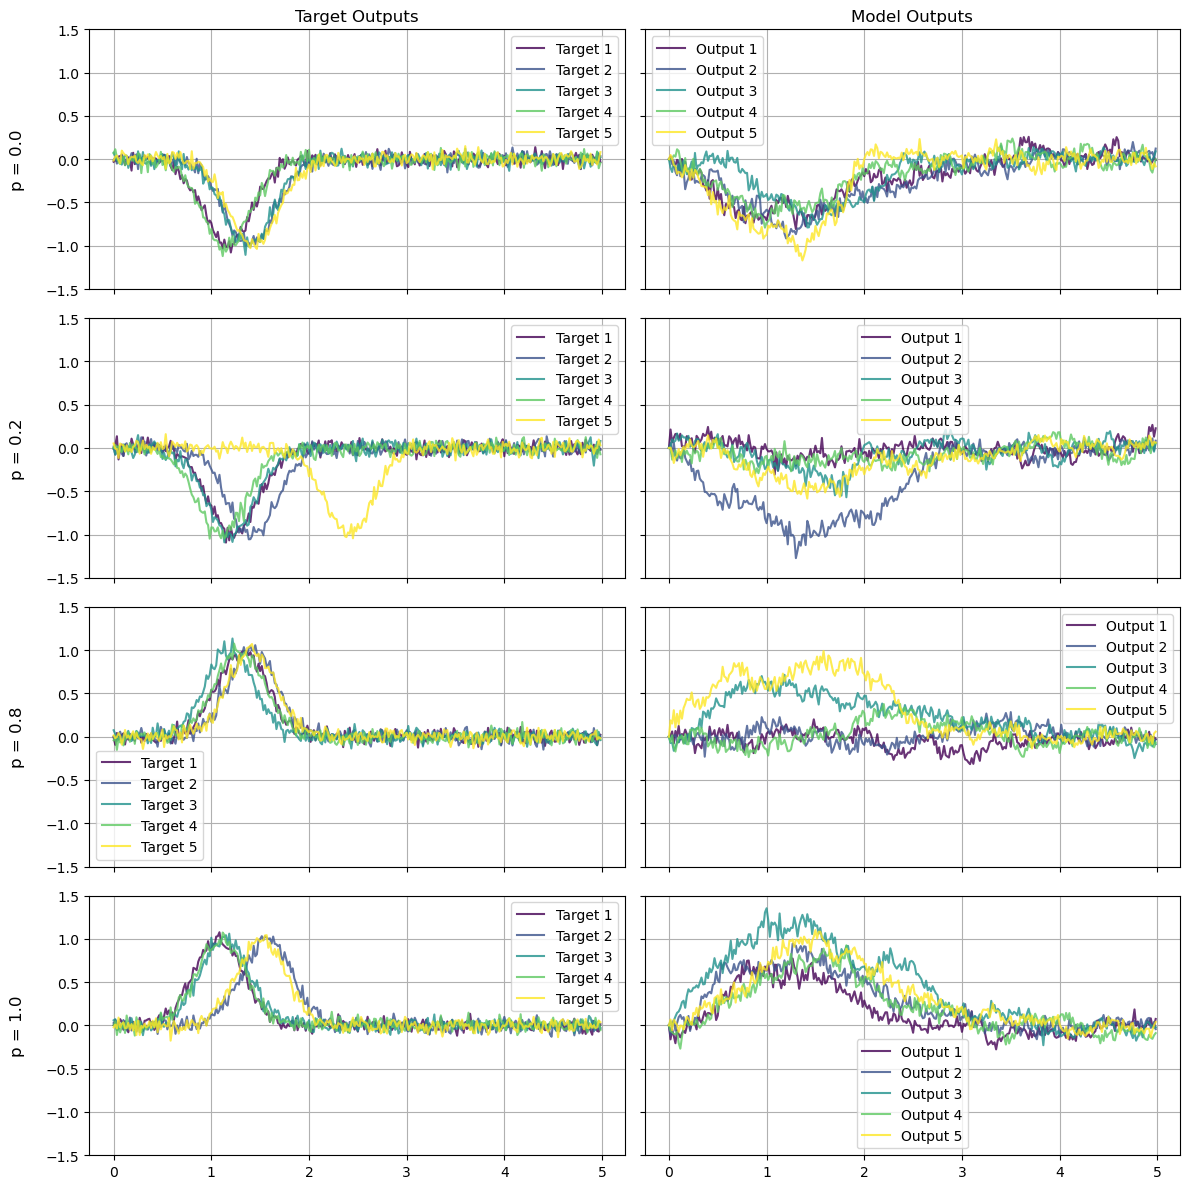

Epoch 21/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 21/200, Loss: -0.6694


Epoch 22/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 22/200, Loss: -0.6739


Epoch 23/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 23/200, Loss: -0.6792


Epoch 24/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 24/200, Loss: -0.6766


Epoch 25/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 25/200, Loss: -0.6801


Epoch 26/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 26/200, Loss: -0.6913


Epoch 27/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 27/200, Loss: -0.6952


Epoch 28/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 28/200, Loss: -0.7001


Epoch 29/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 29/200, Loss: -0.7033


Epoch 30/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 30/200, Loss: -0.7033


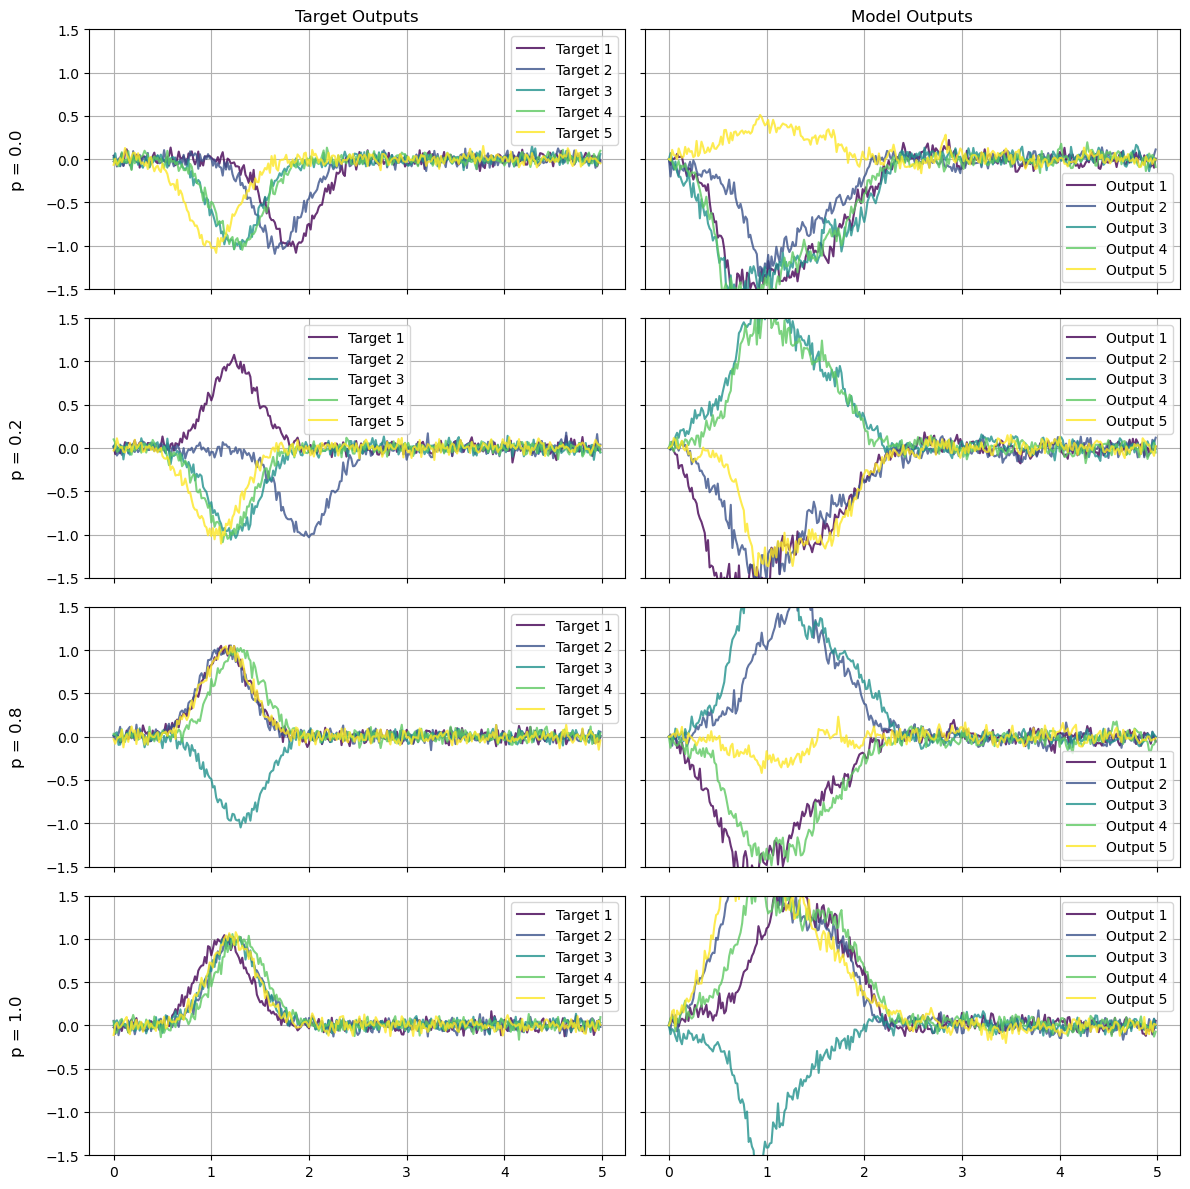

Epoch 31/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 31/200, Loss: -0.7042


Epoch 32/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 32/200, Loss: -0.7085


Epoch 33/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 33/200, Loss: -0.7143


Epoch 34/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 34/200, Loss: -0.7090


Epoch 35/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 35/200, Loss: -0.7157


Epoch 36/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 36/200, Loss: -0.7109


Epoch 37/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 37/200, Loss: -0.7121


Epoch 38/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 38/200, Loss: -0.7133


Epoch 39/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 39/200, Loss: -0.7172


Epoch 40/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 40/200, Loss: -0.7131


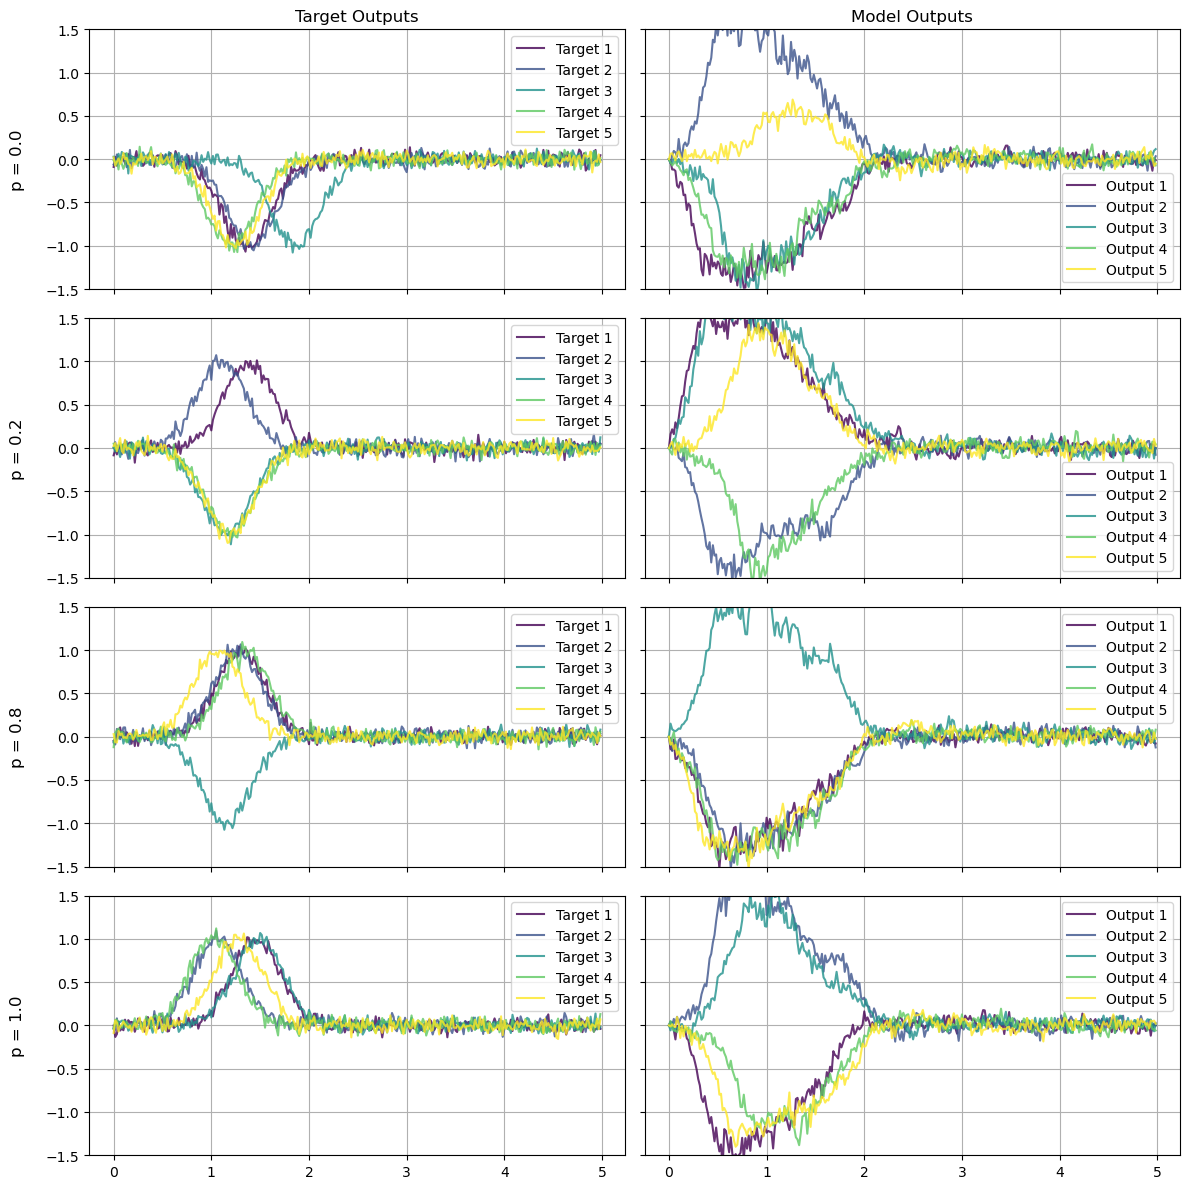

Epoch 41/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 41/200, Loss: -0.7195


Epoch 42/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 42/200, Loss: -0.7134


Epoch 43/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 43/200, Loss: -0.7193


Epoch 44/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 44/200, Loss: -0.7217


Epoch 45/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 45/200, Loss: -0.7230


Epoch 46/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 46/200, Loss: -0.7240


Epoch 47/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 47/200, Loss: -0.7215


Epoch 48/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 48/200, Loss: -0.7281


Epoch 49/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 49/200, Loss: -0.7248


Epoch 50/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 50/200, Loss: -0.7212


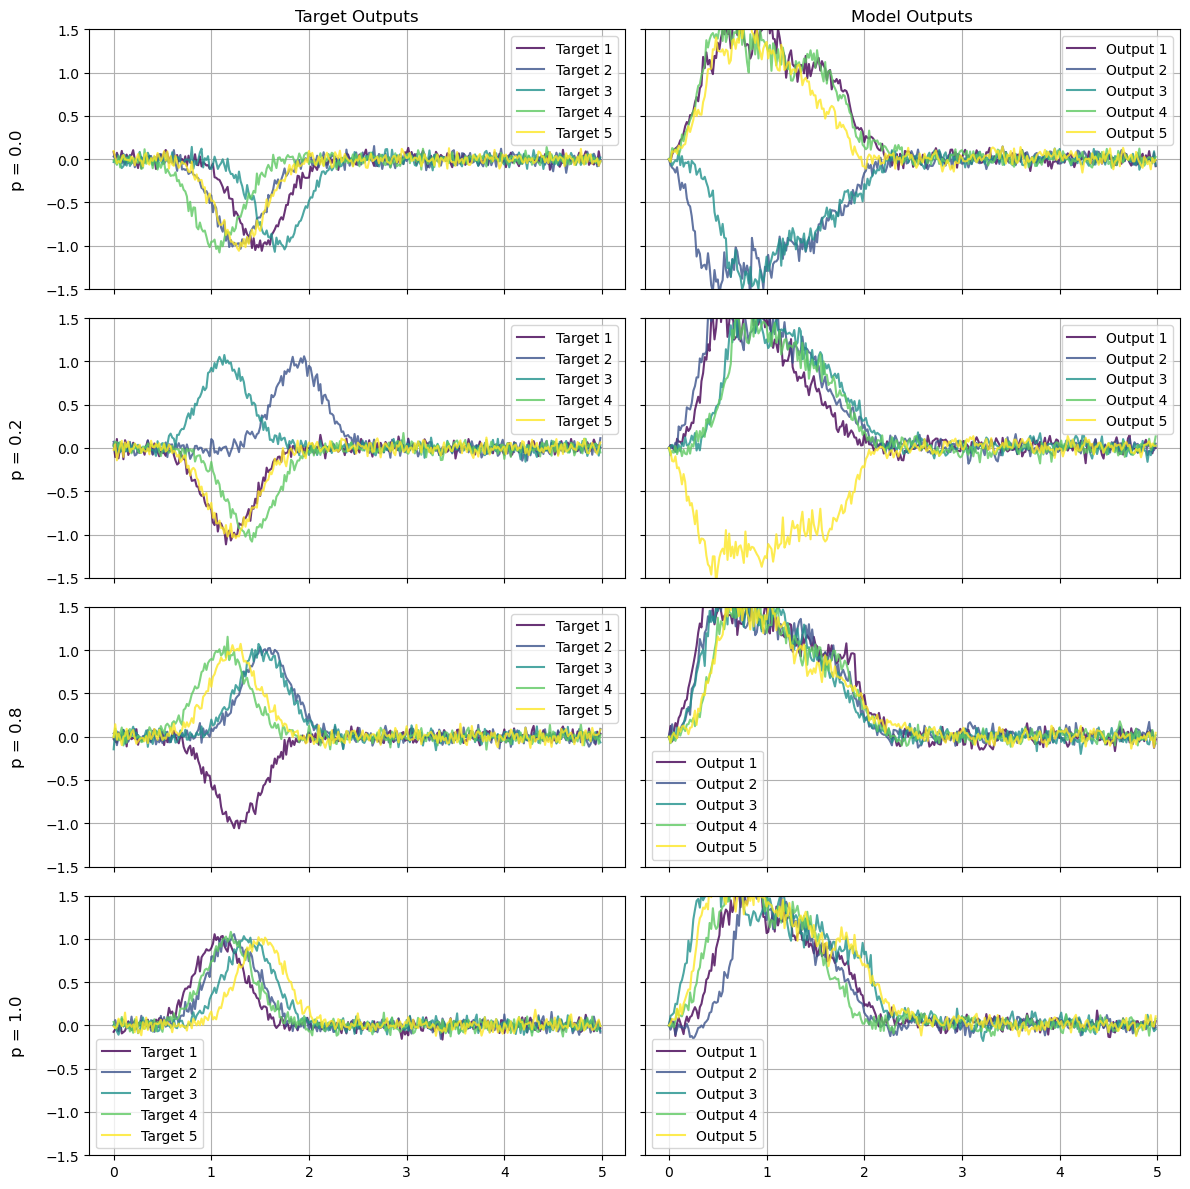

Epoch 51/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 51/200, Loss: -0.7159


Epoch 52/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 52/200, Loss: -0.7230


Epoch 53/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 53/200, Loss: -0.7214


Epoch 54/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 55/200, Loss: -0.7217


Epoch 56/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 56/200, Loss: -0.7256


Epoch 57/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 57/200, Loss: -0.7290


Epoch 58/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 58/200, Loss: -0.7301


Epoch 59/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 59/200, Loss: -0.7240


Epoch 60/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 60/200, Loss: -0.7189


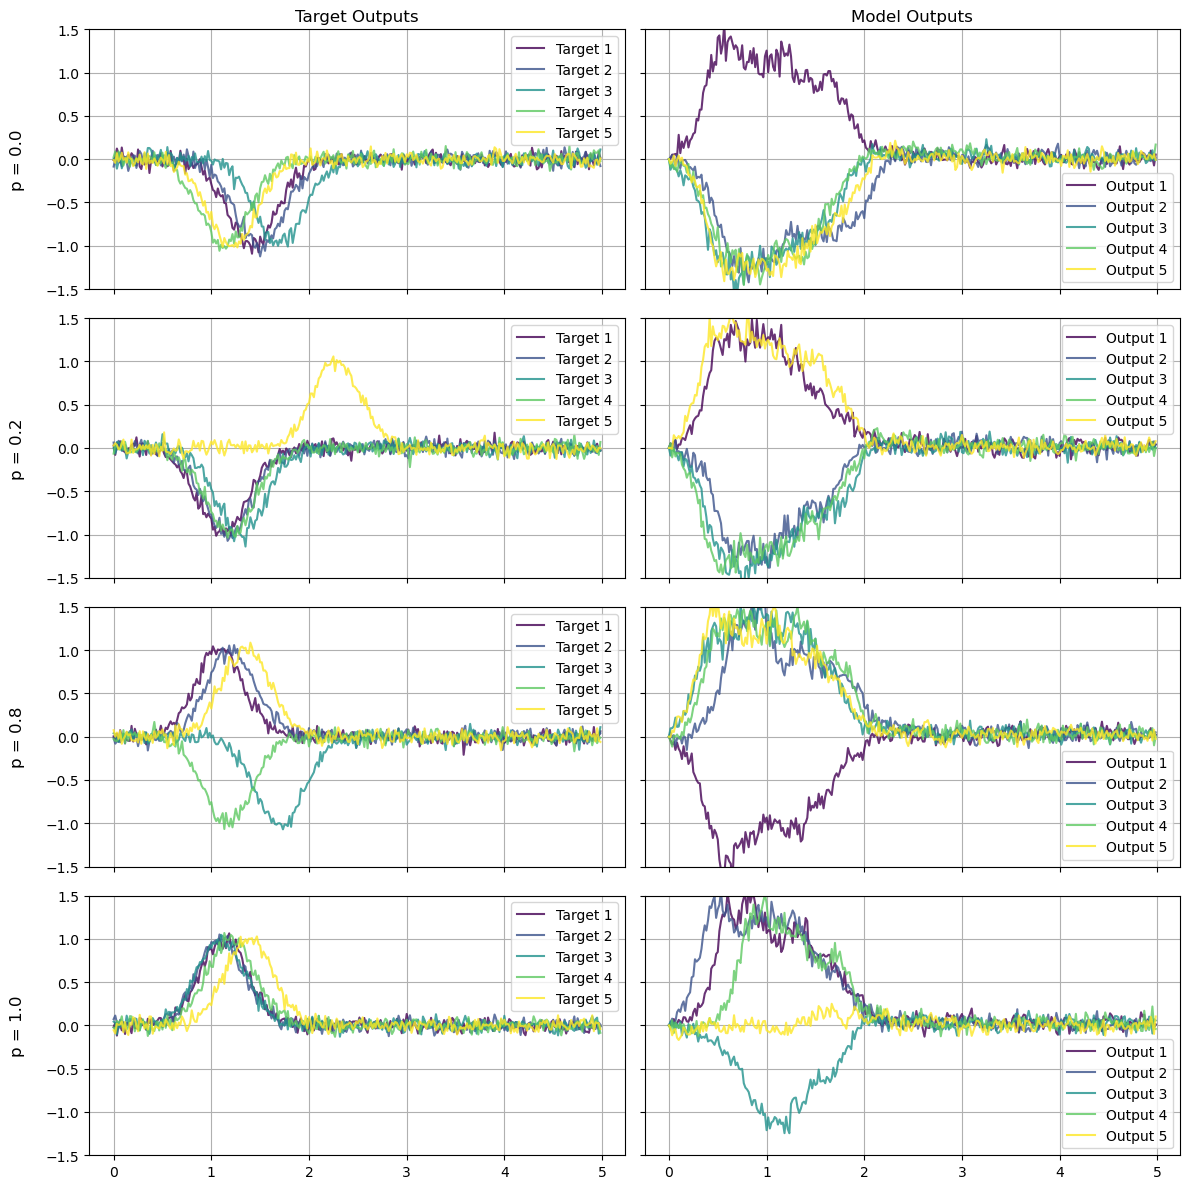

Epoch 61/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 61/200, Loss: -0.7166


Epoch 62/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 62/200, Loss: -0.7301


Epoch 63/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 63/200, Loss: -0.7352


Epoch 64/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 64/200, Loss: -0.7332


Epoch 65/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 65/200, Loss: -0.7312


Epoch 66/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 66/200, Loss: -0.7294


Epoch 67/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 67/200, Loss: -0.7389


Epoch 68/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 68/200, Loss: -0.7323


Epoch 69/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 69/200, Loss: -0.7355


Epoch 70/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 70/200, Loss: -0.7335


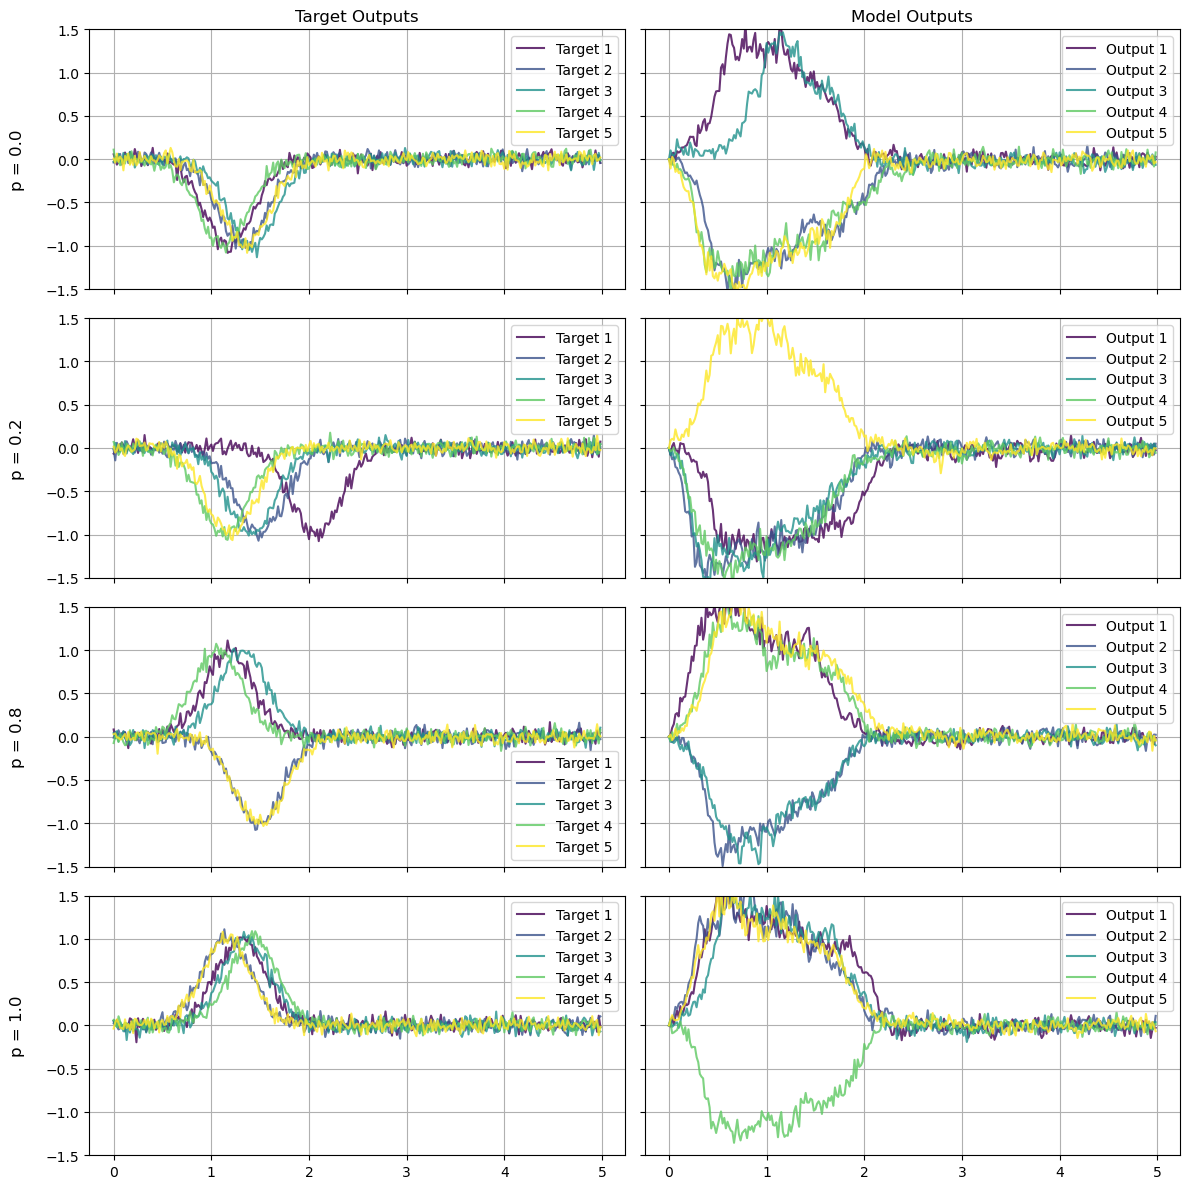

Epoch 71/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 71/200, Loss: -0.7329


Epoch 72/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 72/200, Loss: -0.7327


Epoch 73/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 73/200, Loss: -0.7377


Epoch 74/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 74/200, Loss: -0.7345


Epoch 75/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 75/200, Loss: -0.7429


Epoch 76/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 76/200, Loss: -0.7379


Epoch 77/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 77/200, Loss: -0.7425


Epoch 78/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 78/200, Loss: -0.7410


Epoch 79/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 86/200, Loss: -0.7471


Epoch 87/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 87/200, Loss: -0.7495


Epoch 88/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 88/200, Loss: -0.7449


Epoch 89/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 89/200, Loss: -0.7460


Epoch 90/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 90/200, Loss: -0.7502


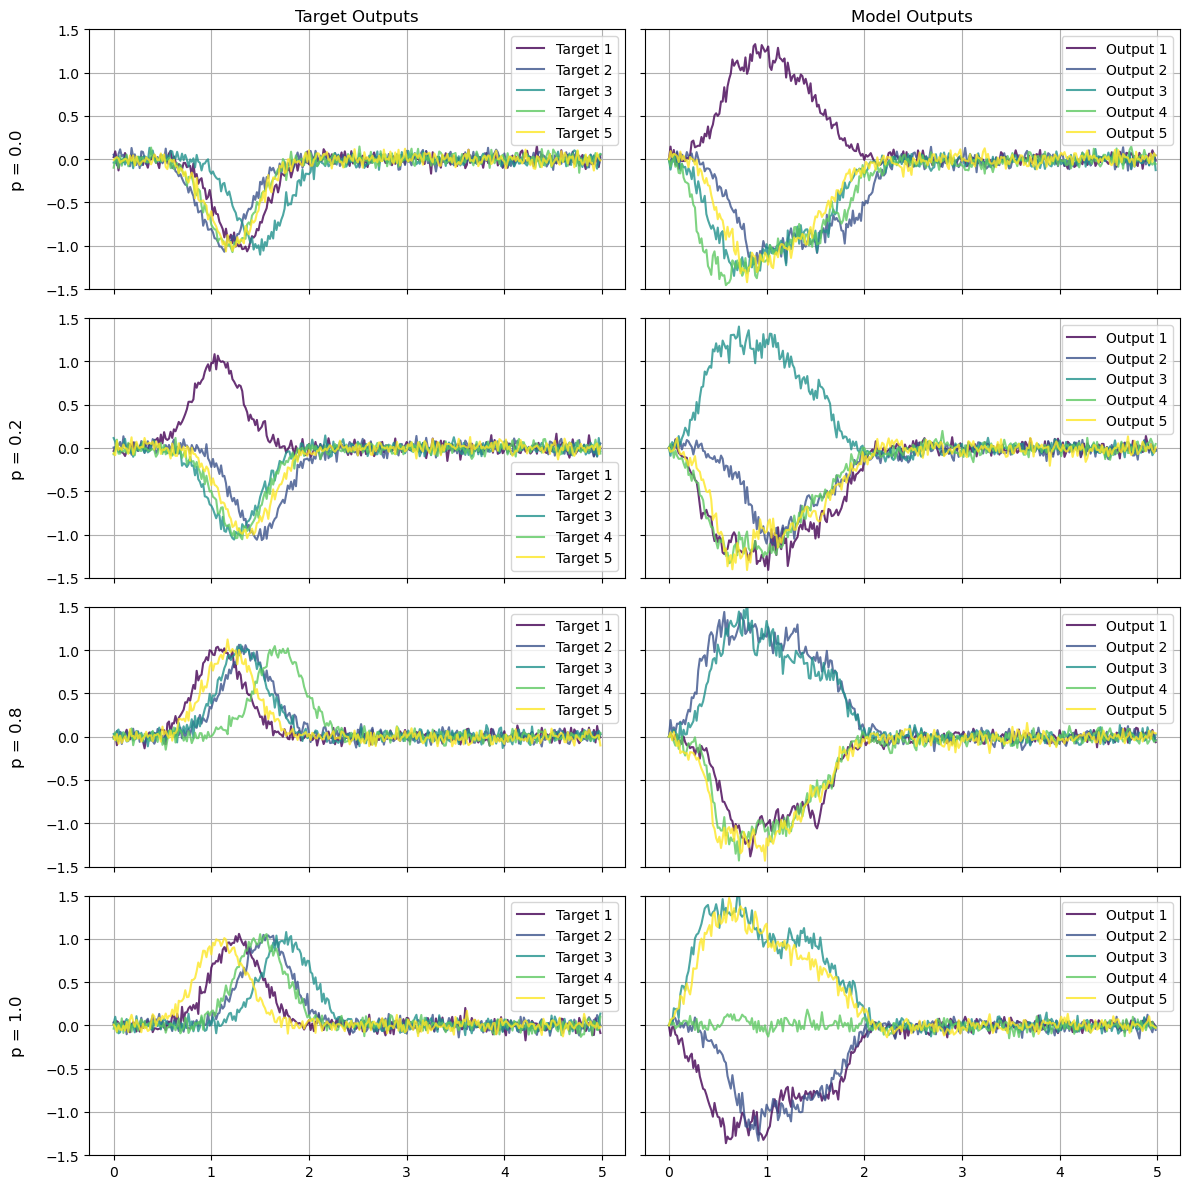

Epoch 91/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 91/200, Loss: -0.7500


Epoch 92/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 92/200, Loss: -0.7494


Epoch 93/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 93/200, Loss: -0.7517


Epoch 94/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 94/200, Loss: -0.7508


Epoch 95/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 95/200, Loss: -0.7485


Epoch 96/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 96/200, Loss: -0.7456


Epoch 97/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 97/200, Loss: -0.7495


Epoch 98/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 98/200, Loss: -0.7466


Epoch 99/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 99/200, Loss: -0.7456


Epoch 100/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 100/200, Loss: -0.7417


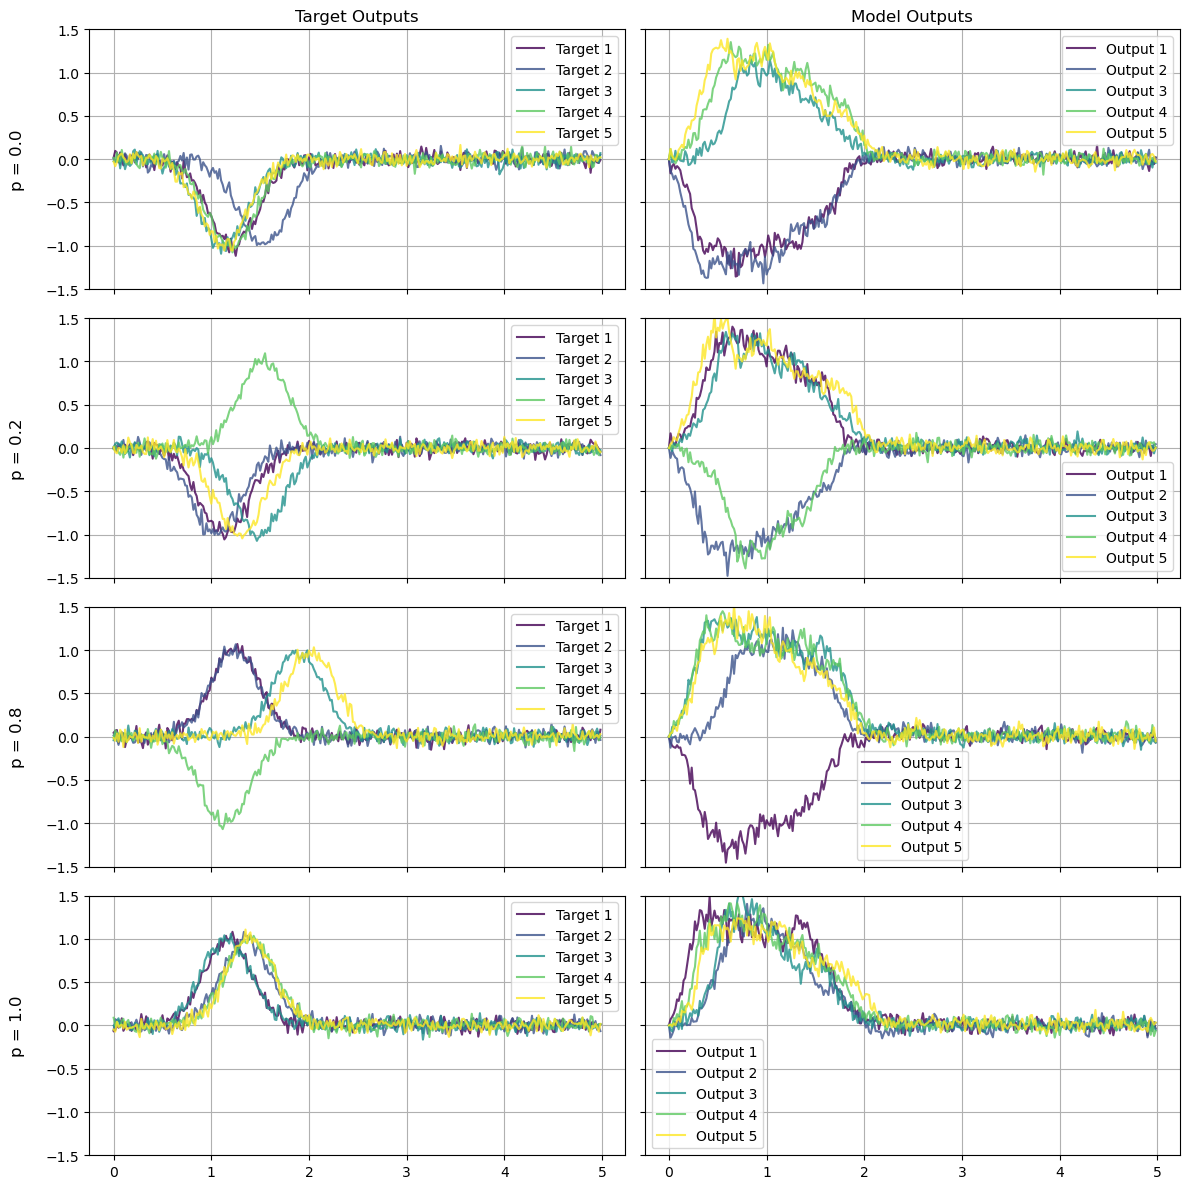

Epoch 101/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 101/200, Loss: -0.7465


Epoch 102/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 102/200, Loss: -0.7504


Epoch 103/200:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 103/200, Loss: -0.7461


Epoch 104/200:   0%|          | 0/50 [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [ ]:
model = rmdn.RMDN(TRAINING_PARAMS['hidden_size'], input_size=3)
if device != 'cpu':
    model = model.to(device)

optimizer = torch.optim.AdamW(model.parameters(), lr=TRAINING_PARAMS['initial_learning_rate'], betas=(0.99, 0.999), weight_decay=1e-4)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, min_lr=TRAINING_PARAMS['min_lr'])

dataset = utils.DecisionDataset(generate=True)
dataloader = DataLoader(dataset, batch_size=TRAINING_PARAMS['batch_size'], shuffle=True)

epoch_progress = tqdm(range(TRAINING_PARAMS['num_epochs']), desc="Training Progress", position=0, leave=True)

for epoch in epoch_progress:
    epoch_loss = 0
    
    progress_bar = tqdm(dataloader, desc=f"Epoch {epoch+1}/{TRAINING_PARAMS['num_epochs']}", position=1, leave=False)

    for inputs, targets in progress_bar:
        optimizer.zero_grad()

        if device != 'cpu':
            inputs, targets = inputs.to(device, non_blocking=True), targets.to(device, non_blocking=True)

        # Forward Pass
        pi, mu, sigma, h_states = model(inputs, epoch, TRAINING_PARAMS['num_epochs'], train=True, outputs=targets)
        loss = rmdn.mdn_loss(pi, mu, sigma, targets, h_states)
        
        # Backward Pass
        loss.backward()
        
        # Optimization Step
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0) #clip gradients
        optimizer.step()

        epoch_loss += loss.item()

    scheduler.step(epoch_loss / len(dataloader))
    print(f"Epoch {epoch + 1}/{TRAINING_PARAMS['num_epochs']}, Loss: {epoch_loss / len(dataloader):.4f}")

    if (epoch + 1) % 10 == 0:
        utils.visualize_performance([0.0, 0.2, 0.8, 1.0], 5)

torch.save(model.state_dict(), 'model_weights.pth')

print("Training Complete!")